<a href="https://colab.research.google.com/github/AidaNiknejad/SentimentAnalysis/blob/main/Sentiment_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Google Drive
from google.colab import drive
drive.mount('/content/drive')
path='drive/MyDrive/Colab data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title Install
!pip install seaborn
!pip install imbalanced-learn
!pip install wordcloud
!pip install matplotlib



In [ ]:
# @title Libraries

import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# @title Data
data=pd.read_csv(path+'train_data.csv')

<ipython-input-4-0f4bef6d2719>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(path+'train_data.csv')


In [ ]:
# @title Print Data
data

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600
...,...,...,...,...,...,...,...,...,...,...,...
838939,5,NaN,True,2017-07-25,A1OOVLE2KZ6KGA,B01HJCN1EI,NaN,Puddzee,These are my favorite charging cords for a few...,Worth the price.,1500940800
838940,1,NaN,True,2017-04-04,A77K1B31UAQ29,B01HJCN1EI,NaN,addictedtoreading,"Update....after 2 months of gentle use, cable ...",UPDATE...BREAKS AND SLOW CHARGING,1491264000
838941,3,NaN,True,2017-07-08,A2SVXUVUAWUDK2,B01HJH42KU,NaN,Andrew,These are okay. The connection becomes very if...,Hope this makes sense. You'd understand if you...,1499472000
838942,5,2.0,True,2016-12-01,A2HUZO7MQAY5I2,B01HJH40WU,NaN,michael clontz,"Ok here is an odd thing that happened to me, I...",Not the correct product as linked in the sale.,1480550400


In [ ]:
# @title Missing Values
data.isna().sum()

overall                0
vote              647476
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             348331
reviewerName         227
reviewText             0
summary               76
unixReviewTime         0
dtype: int64

<Axes: xlabel='overall', ylabel='Count'>

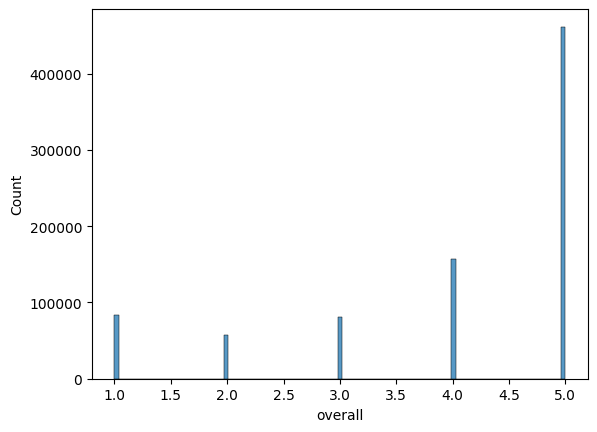

In [ ]:
# @title Plot
sns.histplot(data.overall)

تصویر بدست آمده نشان می‌دهد که توزیع مقادیر این ستون بسیار نامتوازن است
 .اکثر مقادیر در رده ۵ قرار دارند و تعداد کمتری در سایر رده‌ها  قرار گرفته‌اند
این توازن نامتعادل می‌تواند در مدل‌سازی مشکل ایجاد کند، زیرا مدل به کلاس‌هایی که تعداد بیشتری دارند توجه بیشتری می‌کند و ممکن است در تشخیص کلاس‌های کمتر دچار مشکل شود.
وقتی داده‌های زیادی داریم و می‌توانیم بدون از دست دادن اطلاعات مهم، برخی از آنها را حذف کنیم از روش زیر استفاده می کنیم

In [ ]:
# @title Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(data.drop('overall', axis=1), data['overall'])
data_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['overall'])], axis=1)

<Axes: xlabel='overall', ylabel='Count'>

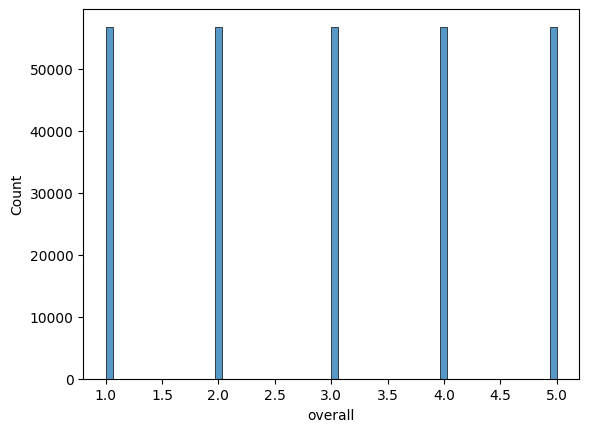

In [ ]:
# @title New Plot
sns.histplot(data_resampled.overall)

In [ ]:
# @title Data
data=pd.read_csv(path+'train_data.csv')

<ipython-input-10-0f4bef6d2719>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(path+'train_data.csv')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


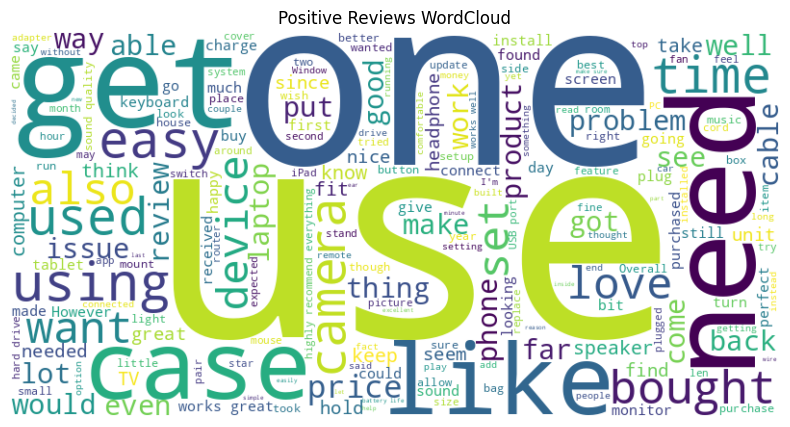

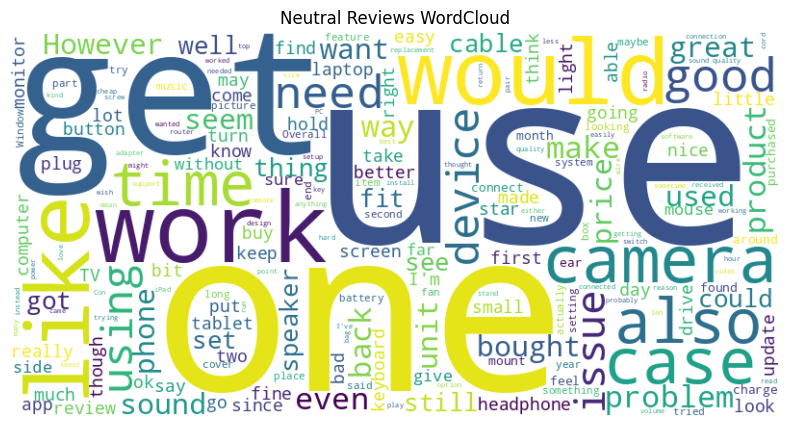

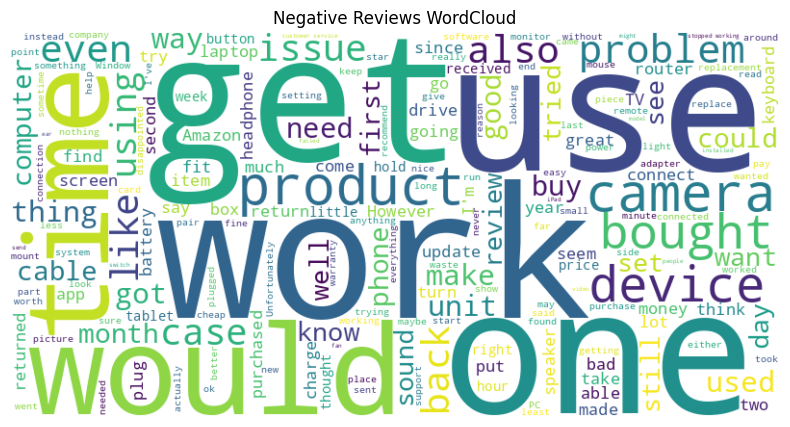

In [ ]:
# @title Second Part
positive_reviews = data[data['overall'] >= 4]
neutral_reviews = data[data['overall'] == 3]
negative_reviews = data[data['overall'] <= 2]

# دانلود Stop words در صورت نیاز
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# تقسیم‌بندی نظرات به سه دسته مثبت، خنثی و منفی
positive_reviews = data[data['overall'] >= 4]
neutral_reviews = data[data['overall'] == 3]
negative_reviews = data[data['overall'] <= 2]

# تابعی برای تولید و نمایش WordCloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(' '.join(text.dropna().astype(str)))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# ایجاد WordCloud برای نظرات مثبت، خنثی و منفی
generate_wordcloud(positive_reviews['reviewText'], 'Positive Reviews WordCloud')
generate_wordcloud(neutral_reviews['reviewText'], 'Neutral Reviews WordCloud')
generate_wordcloud(negative_reviews['reviewText'], 'Negative Reviews WordCloud')

کلمات مشترک:
use / used / using: این کلمات در هر سه دسته بسیار برجسته هستند. این نشان می‌دهد که موضوع استفاده از محصول برای همه کاربران اهمیت زیادی دارد. این کلمات به معنای کلی نشان می‌دهند که کاربران به کاربردپذیری و استفاده از محصول توجه ویژه‌ای دارند.

one: این کلمه نیز در هر سه دسته برجسته است. احتمالاً این کلمه به استفاده کاربران از "یک" محصول خاص یا "یک" ویژگی خاص از محصول اشاره دارد.

work / working: این کلمات نشان‌دهنده کارکرد محصول است و در هر سه دسته به چشم می‌خورند. این کلمه بیانگر عملکرد محصول است و می‌تواند هم در نظرات مثبت و هم منفی مورد استفاده قرار گیرد.

تحلیل و تفسیر:
مثبت (Positive Reviews):

در نظرات مثبت، کلماتی مانند "easy"، "great"، "well" و "good" برجسته هستند. این کلمات نشان می‌دهند که کاربران از محصول راضی هستند و به ویژگی‌های مثبت آن اشاره دارند.
کلماتی مانند "bought"، "love"، "perfect" نیز نشان‌دهنده تجربه‌های مثبت خرید و استفاده هستند.
خنثی (Neutral Reviews):

در نظرات خنثی، کلماتی مانند "get"، "device"، "better"، "would" بیشتر دیده می‌شوند. این کلمات نشان می‌دهند که نظرات کاربران در این دسته معمولاً به توصیه‌ها و پیشنهادات برای بهبود محصول می‌پردازند.
کلماتی مانند "camera"، "case"، "like" نیز به ویژگی‌های خاص محصول اشاره دارند که می‌تواند هم مثبت و هم منفی تلقی شود.
منفی (Negative Reviews):

در نظرات منفی، کلماتی مانند "problem"، "issue"، "return" و "waste" برجسته هستند. این کلمات نشان می‌دهند که کاربران با مشکلاتی مواجه شده‌اند و تجربه‌ی منفی خود را بیان کرده‌اند.
کلماتی مانند "bad"، "poor"، "broken" نیز نشان‌دهنده نارضایتی کاربران از کیفیت محصول هستند.

نتیجه‌گیری:
کلمات مشترک: وجود کلمات مشترک بین سه دسته نشان‌دهنده اهمیت این ویژگی‌ها و عملکردها برای کاربران است. کلمات مشترک مثل "use" و "work" نشان می‌دهند که کاربردپذیری و عملکرد محصول از اصلی‌ترین نگرانی‌های کاربران است.
کلمات منحصر به فرد: کلمات منحصر به فرد در هر دسته (مثبت، منفی و خنثی) نشان‌دهنده تجربیات خاص کاربران و نقاط قوت و ضعف محصول هستند.
توصیه: برای بهبود محصولات و خدمات، تحلیل کلمات منحصر به فرد و مشترک می‌تواند به شناسایی نیازها و مشکلات کاربران کمک کند و در نهایت به بهبود کیفیت محصولات منجر شود.
به طور کلی، تحلیل این WordCloudها می‌تواند اطلاعات ارزشمندی درباره‌ی نظرات کاربران و نیازهای آن‌ها فراهم کند که می‌تواند در تصمیم‌گیری‌های تجاری و بهبود محصولات موثر باشد.

In [ ]:
# @title Third Part
# تبدیل مقادیر vote به عدد
data['vote'] = pd.to_numeric(data['vote'], errors='coerce')

In [ ]:
# @title Third Part
# حذف مقادیر نامعتبر (NaN) پس از تبدیل
data = data.dropna(subset=['vote'])

# محاسبه مجموع vote برای هر فرد
top_voters = data.groupby('reviewerName')['vote'].sum().nlargest(10)


In [ ]:
# @title Third Part
# ایجاد DataFrame برای نمایش مجموع نظرات و تعداد vote برای 10 نفر برتر
top_voters_df = data[data['reviewerName'].isin(top_voters.index)].groupby('reviewerName').agg({'overall': 'count', 'vote': 'sum'})
top_voters_df = top_voters_df.rename(columns={'overall': 'number_of_reviews', 'vote': 'total_votes'})

print(top_voters_df)


                 number_of_reviews  total_votes
reviewerName                                   
Amazon Customer               4855      28871.0
Benson Leung                    29       4572.0
Chris                          326       2060.0
Dave                           211       2230.0
David                          267       2194.0
John                           328       2730.0
Kindle Customer                473       2927.0
Michael                        330       3710.0
Mike                           410       3000.0
Steve                          271       2046.0


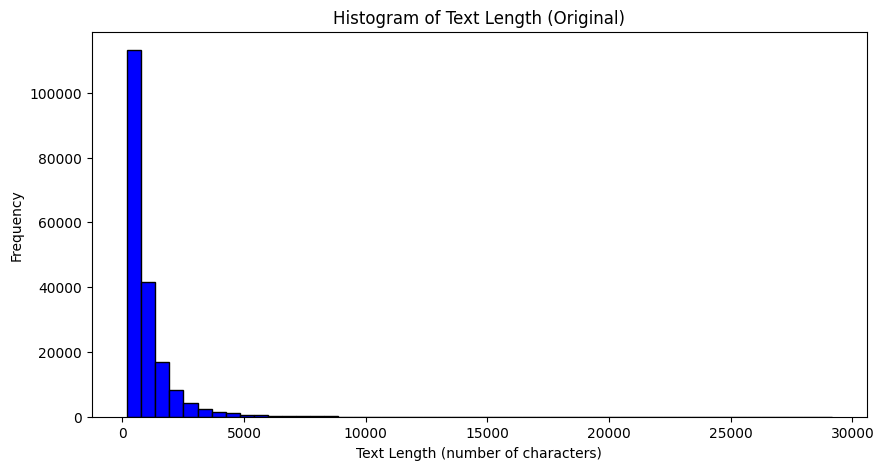

In [ ]:
# @title Fourth Part For Original Mode

# محاسبه طول متن (تعداد کاراکتر) برای هر review
data['text_length'] = data['reviewText'].str.len()

# رسم هیستوگرام برای طول متن
plt.figure(figsize=(10, 5))
plt.hist(data['text_length'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Text Length (Original)')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.show()



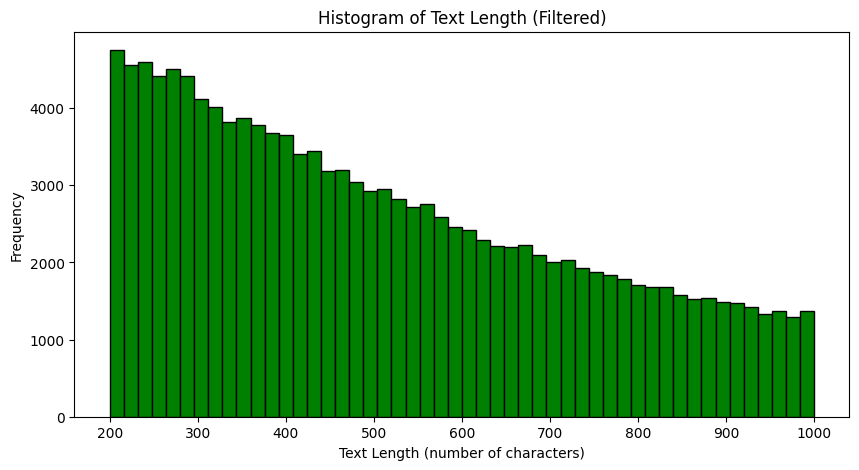

پیشنهاد می‌شود طول متن بین 20 و 1000 کاراکتر باشد.


In [ ]:
# @title Fourth Part For Filtered mode
# فیلتر کردن داده‌ها برای حذف نمونه‌های کم و پرت
filtered_data = data[(data['text_length'] >= 20) & (data['text_length'] <= 1000)]

# رسم هیستوگرام برای طول متن (فیلترشده)
plt.figure(figsize=(10, 5))
plt.hist(filtered_data['text_length'].dropna(), bins=50, color='green', edgecolor='black')
plt.title('Histogram of Text Length (Filtered)')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.show()
# پیشنهاد محدودیت روی تعداد کاراکترها
min_length = 20
max_length = 1000
print(f"پیشنهاد می‌شود طول متن بین {min_length} و {max_length} کاراکتر باشد.")


بازه پیشنهادی براساس تحلیل هیستوگرام طول متن انتخاب شده است. در اینجا به توضیح دلایل این انتخاب می‌پردازم:

نمونه‌های کم و پرت:

متن‌هایی با طول بسیار کم (کمتر از 20 کاراکتر) احتمالاً اطلاعات کافی برای تحلیل ندارند و ممکن است شامل نظرات بسیار کوتاه و بدون معنی باشند.
متن‌هایی با طول بسیار زیاد (بیشتر از 1000 کاراکتر) ممکن است نمونه‌های نادر و غیر معمول باشند و در عمل بیشتر نویز به مدل اضافه کنند تا اطلاعات مفید.
تمرکز بیشتر نمونه‌ها:

با فیلتر کردن داده‌ها به بازه‌ای که بیشتر نمونه‌ها در آن قرار دارند، مدل‌سازی بهینه‌تر و دقت بالاتری خواهیم داشت.
در نمودارهای هیستوگرام اصلی و فیلتر شده، می‌توان مشاهده کرد که اکثر نمونه‌ها در بازه بین 20 تا 1000 کاراکتر قرار دارند.
کاهش پیچیدگی مدل:

مدل‌هایی که باید متن‌های بسیار طولانی را پردازش کنند، ممکن است پیچیدگی بیشتری داشته باشند و زمان آموزش و پیش‌بینی طولانی‌تری نیاز داشته باشند.
با محدود کردن طول متن، مدل ساده‌تر و کارآمدتری خواهیم داشت.
تجربه عملی:

در بسیاری از مسائل پردازش متن و تحلیل نظرات، طول متن‌هایی که بسیار کوتاه یا بسیار بلند هستند، معمولاً مشکلاتی ایجاد می‌کنند. برای مثال، متن‌های کوتاه ممکن است برای استخراج ویژگی‌های مفید ناکافی باشند و متن‌های بلند ممکن است باعث بیش‌باعثی (overfitting) شوند.

In [ ]:
# @title Fifth Part

# بارگذاری داده‌ها
title_brand_df = pd.read_csv(path+'title_brand.csv')
train_data_df = pd.read_csv(path+'train_data.csv')

# فیلتر کردن نظرات با امتیاز ۵
five_star_reviews = train_data_df[train_data_df['overall'] == 5]

# محاسبه تعداد نظرات با امتیاز ۵ برای هر محصول
five_star_counts = five_star_reviews.groupby('asin')['overall'].count()

# انتخاب ۱۰ محصول با بیشترین تعداد نظرات با امتیاز ۵
top_products_five_star = five_star_counts.nlargest(10)

# فیلتر کردن داده‌های مربوط به محصولات برتر
top_five_star_reviews_df = five_star_reviews[five_star_reviews['asin'].isin(top_products_five_star.index)]

# ترکیب با نام برند‌ها
top_five_star_reviews_summary = top_five_star_reviews_df.groupby('asin').agg({
    'overall': 'count'
}).reset_index()

# اضافه کردن نام برند‌ها
top_five_star_reviews_summary = top_five_star_reviews_summary.merge(title_brand_df[['asin', 'brand']], on='asin', how='left')

# نام‌گذاری ستون‌ها
top_five_star_reviews_summary.columns = ['Product ID', 'Number of 5-Star Reviews', 'Brand']

# مرتب‌سازی بر اساس تعداد نظرات با امتیاز ۵
top_five_star_reviews_summary = top_five_star_reviews_summary.sort_values(by='Number of 5-Star Reviews', ascending=False)

# نمایش نتایج
print(top_five_star_reviews_summary[['Brand', 'Product ID', 'Number of 5-Star Reviews']])


<ipython-input-17-7e4318345053>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data_df = pd.read_csv(path+'train_data.csv')


                    Brand  Product ID  Number of 5-Star Reviews
8    Cambridge Soundworks  B010OYASRG                      1163
3                 NETGEAR  B00L0YLRUW                       659
9                    Roku  B01DA0YCNC                       600
0                StarTech  B000VS4HDM                       598
2                Logitech  B0043T7FXE                       552
5                 Samsung  B00OBRE5UE                       529
7                    Asus  B00S9SGNNS                       471
1               VideoSecu  B000WYVBR0                       448
6  Arlo Technologies, Inc  B00P7EVST6                       433
4                 Samsung  B00OAJ412U                       431


In [ ]:
# @title Check Columns
print(data.columns)


Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'text_length'],
      dtype='object')


In [ ]:
# @title New Data
data = pd.read_csv(path+'train_data.csv')
New_data = pd.read_csv(path+'title_brand.csv')


<ipython-input-19-c6744f40f80f>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path+'train_data.csv')


In [ ]:
# @title Print New Data
New_data

,asin,title,brand
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.
2,0060009810,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page
4,0060786817,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page
...,...,...,...
786440,B01HJGOOMW,Tukzer Cassette Player Portable Tape Player Ca...,Tukzer
786441,B01HJH3XLE,Cobiter AC Adapter Battery Charger For IBM LEN...,Cobiter
786442,B01HJH6CEY,Baofeng Original Li-ion Battery Charger Deskto...,COOLBOY
786443,B01HJH40WU,Jricoo 3pack 6ft Micro USB to USB Cable 2.0 6f...,Jricoo


In [ ]:
# @title Sixth Part
import pandas as pd

# ترکیب دو DataFrame با استفاده از ستون 'asin'
combined_data = pd.merge(data, New_data[['asin', 'brand']], on='asin', how='inner')

# محاسبه تعداد نظرات برای هر برند
brand_review_counts = combined_data['brand'].value_counts().nlargest(10)

# فیلتر کردن داده‌ها برای برندهای برتر
top_brands_df = combined_data[combined_data['brand'].isin(brand_review_counts.index)]

# محاسبه میانگین امتیاز برای هر برند
brand_avg_rating = top_brands_df.groupby('brand')['overall'].mean().reset_index()

# تغییر نام ستون‌ها برای خوانایی بهتر
brand_avg_rating.columns = ['Brand', 'Average Rating']

# محاسبه تعداد نظرات با امتیاز 5 برای هر برند
brand_review_5_counts = top_brands_df[top_brands_df['overall'] == 5].groupby('brand')['overall'].count().reset_index()
brand_review_5_counts.columns = ['Brand', 'Review Count 5']

# ترکیب داده‌های میانگین امتیاز و تعداد نظرات با امتیاز 5
merged_df = pd.merge(brand_avg_rating, brand_review_5_counts, on='Brand')

# مرتب‌سازی بر اساس میانگین امتیاز
merged_df = merged_df.sort_values(by='Average Rating', ascending=False)

# نمایش نتایج
print(merged_df)

          Brand  Average Rating  Review Count 5
1         Anker        4.244320            6161
0  AmazonBasics        4.201468            7969
5       Sabrent        4.028005            4129
7       SanDisk        3.958810            4830
3      Logitech        3.954061            8870
6       Samsung        3.941268            8512
8          Sony        3.938726            6438
9       TP-LINK        3.928681            5385
2          Asus        3.855550            6162
4       NETGEAR        3.836274            3944
